# تقرير شامل حول تحدي كاجل: تصنيف المسائل الرياضية

## مقدمة

يهدف هذا التقرير إلى تقديم شرح كامل ومفصل للخطوات التي تم اتخاذها لمواجهة تحدي "KAChallenges Series 1: Classifying Math Problems" على منصة كاجل. يشمل التقرير وصفًا للتحدي، تحليل البيانات المستخدمة، بناء نماذج التصنيف، تقييم أدائها، ومحاولات التحسين، بالإضافة إلى الأكواد البرمجية المستخدمة والنتائج التي تم التوصل إليها.

اللغة الأساسية المستخدمة في الشرح والأكواد هي العربية والإنجليزية (للأكواد وتعليقاتها).

## 1. فهم التحدي ومتطلباته

التحدي يتمحور حول تصنيف مسائل رياضية إلى واحدة من ثماني فئات محددة بناءً على نص السؤال. الفئات هي:

0.  الجبر (Algebra)
1.  الهندسة وحساب المثلثات (Geometry and Trigonometry)
2.  التفاضل والتكامل والتحليل (Calculus and Analysis)
3.  الاحتمالات والإحصاء (Probability and Statistics)
4.  نظرية الأعداد (Number Theory)
5.  التوافيق والرياضيات المتقطعة (Combinatorics and Discrete Mathematics)
6.  الجبر الخطي (Linear Algebra)
7.  أخرى (Other)

البيانات المقدمة تشمل ملف تدريب (`train.csv`) يحتوي على نص السؤال والتصنيف الصحيح، وملف اختبار (`test.csv`) يحتوي على نص السؤال فقط، وملف تقديم نموذجي (`sample_submission.csv`) يوضح الصيغة المطلوبة لملف النتائج.

مقياس التقييم الأساسي للمسابقة هو **F1-score (micro-averaged)**.


## 2. التحليل الاستكشافي للبيانات (EDA)

يهدف هذا القسم إلى تلخيص النتائج الأولية التي تم الحصول عليها من التحليل الاستكشافي لملفات بيانات تحدي كاجل "KAChallenges Series 1: Classifying Math Problems". سيتم استخدام سكريبت بايثون لتحميل البيانات، فحصها، واستخراج الإحصائيات والرسوم البيانية الأساسية. الرسوم البيانية ستُعرض مباشرة في هذا الدفتر.


تم تحميل الملفات بنجاح.

--- معلومات عن بيانات التدريب (train.csv) ---
عدد الصفوف والأعمدة: (10189, 2)

أول 5 صفوف:


,Question,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5



أنواع البيانات:
Question    object
label        int64
dtype: object

القيم المفقودة:
Question    0
label       0
dtype: int64

إحصائيات وصفية للبيانات النصية (عمود Question):


count    10189.000000
mean       262.368731
std        206.886054
min         16.000000
25%        138.000000
50%        219.000000
75%        330.000000
max       6668.000000
Name: question_length, dtype: float64


توزيع الفئات (عمود label):


,proportion
label,
0,25.69%
1,23.94%
2,10.20%
3,3.61%
4,16.80%
5,17.93%
6,0.98%
7,0.84%


C:\Users\babyr\AppData\Local\Temp\ipykernel_12416\4176599827.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis', order=sorted(train_df['label'].unique()))


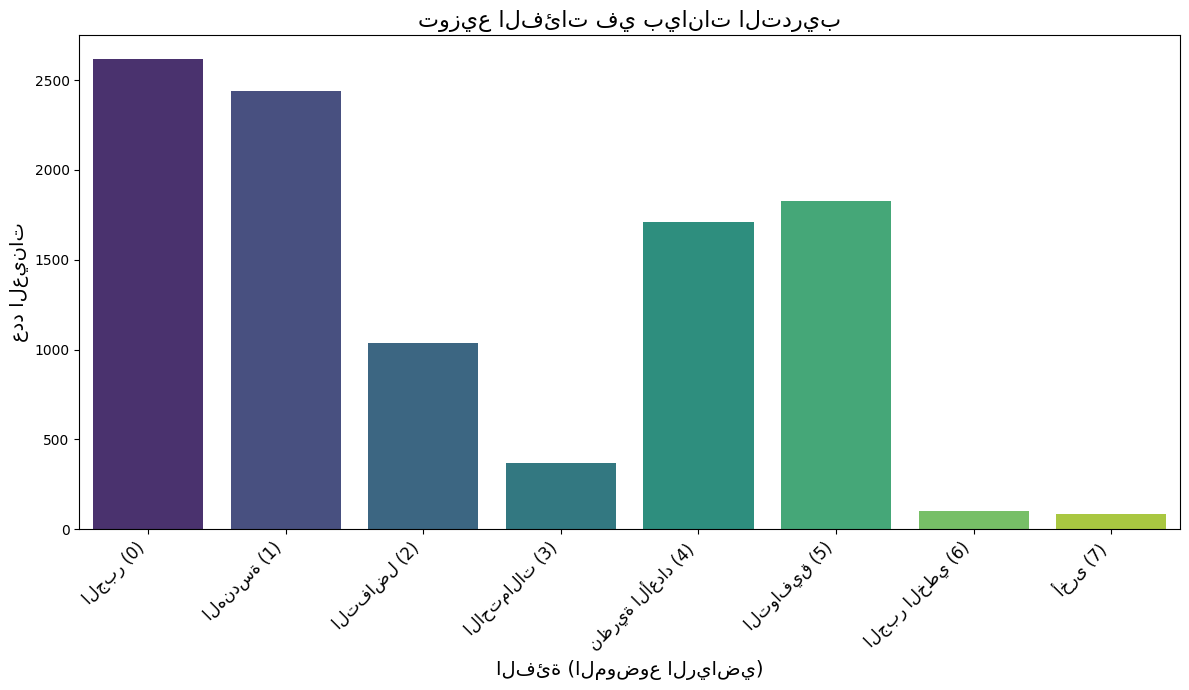

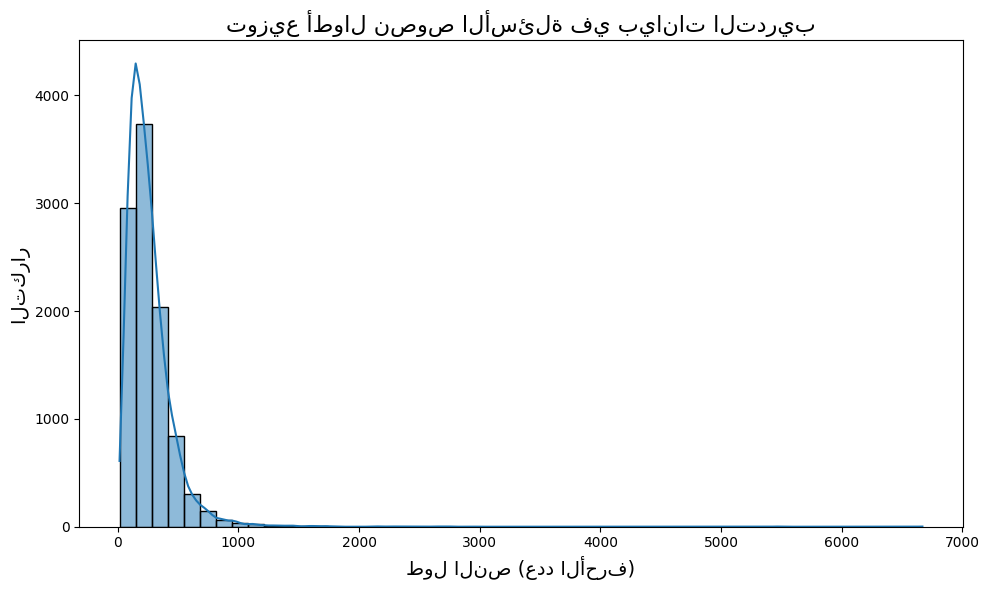


--- معلومات عن بيانات الاختبار (test.csv) ---
عدد الصفوف والأعمدة: (3044, 2)

أول 5 صفوف:


,id,Question
0,0,b'Solve 0 = -i - 91*i - 1598*i - 64220 for i.\n'
1,1,Galperin G.A.\n\nA natural number $N$ is 999.....
2,2,Example 7 Calculate $\frac{1}{2 \sqrt{1}+\sqrt...
3,3,"If $A$, $B$, and $C$ represent three distinct ..."
4,4,2. Calculate $1+12+123+1234+12345+123456+12345...



أنواع البيانات:
id           int64
Question    object
dtype: object

القيم المفقودة:
id          0
Question    0
dtype: int64

إحصائيات وصفية للبيانات النصية (عمود Question):


count    3044.000000
mean      263.856110
std       216.792558
min        25.000000
25%       142.000000
50%       218.000000
75%       329.000000
max      6180.000000
Name: question_length, dtype: float64

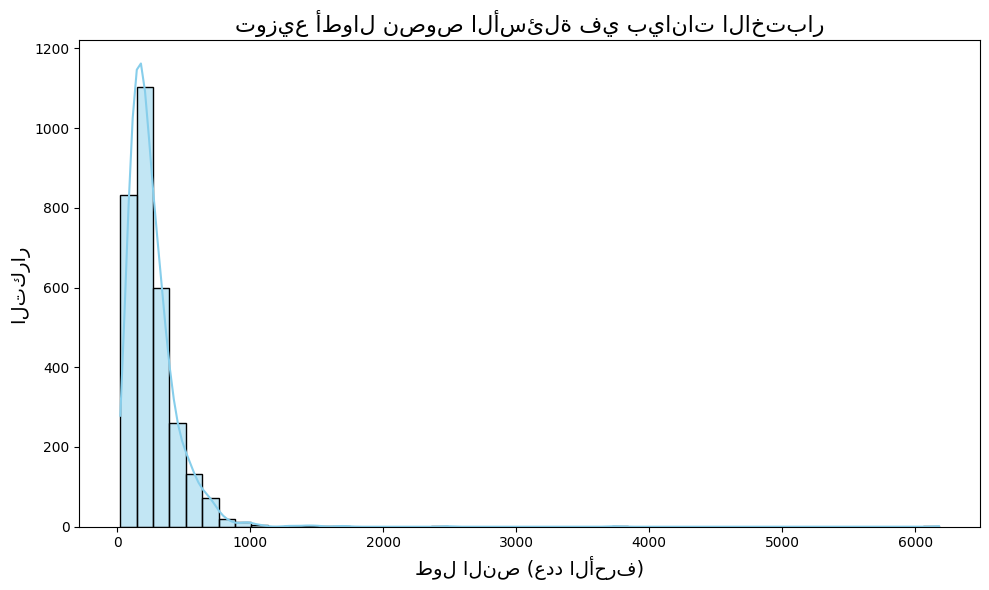


--- معلومات عن ملف التقديم النموذجي (sample_submission.csv) ---
عدد الصفوف والأعمدة: (3044, 2)

أول 5 صفوف:


,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0



أنواع البيانات:
id       int64
label    int64
dtype: object

القيم المفقودة:
id       0
label    0
dtype: int64

اكتمل التحليل الاستكشافي الأولي للبيانات.


In [21]:
# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

try:
    train_df = pd.read_csv("math_competition_data/train.csv")
    test_df = pd.read_csv("math_competition_data/test.csv")
    sample_submission_df = pd.read_csv("math_competition_data/sample_submission.csv")
    print("تم تحميل الملفات بنجاح.")
except FileNotFoundError as e:
    print("خطأ: لم يتم العثور على ملف البيانات داخل مجلد 'math_competition_data'.")
    print(e)
    train_df, test_df, sample_submission_df = None, None, None
except Exception as e:
    print(f"خطأ في تحميل الملفات: {e}")
    train_df, test_df, sample_submission_df = None, None, None

if train_df is not None:
    print("\n--- معلومات عن بيانات التدريب (train.csv) ---")
    print(f"عدد الصفوف والأعمدة: {train_df.shape}")
    print("\nأول 5 صفوف:")
    display(train_df.head())
    print("\nأنواع البيانات:")
    print(train_df.dtypes)
    print("\nالقيم المفقودة:")
    print(train_df.isnull().sum())

    print("\nإحصائيات وصفية للبيانات النصية (عمود Question):")
    train_df['question_length'] = train_df['Question'].apply(lambda x: len(str(x)))
    display(train_df['question_length'].describe())

    print("\nتوزيع الفئات (عمود label):")
    label_distribution = train_df['label'].value_counts(normalize=True).sort_index() * 100
    display(label_distribution.to_frame().style.format("{:.2f}%"))

    plt.figure(figsize=(12, 7))
    sns.countplot(x='label', data=train_df, palette='viridis', order=sorted(train_df['label'].unique()))
    plt.title('توزيع الفئات في بيانات التدريب', fontsize=16)
    plt.xlabel('الفئة (الموضوع الرياضي)', fontsize=14)
    plt.ylabel('عدد العينات', fontsize=14)
    plt.xticks(ticks=range(8), labels=['الجبر (0)', 'الهندسة (1)', 'التفاضل (2)', 'الاحتمالات (3)', 'نظرية الأعداد (4)', 'التوافيق (5)', 'الجبر الخطي (6)', 'أخرى (7)'], rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['question_length'], bins=50, kde=True)
    plt.title('توزيع أطوال نصوص الأسئلة في بيانات التدريب', fontsize=16)
    plt.xlabel('طول النص (عدد الأحرف)', fontsize=14)
    plt.ylabel('التكرار', fontsize=14)
    plt.tight_layout()
    plt.show()

if test_df is not None:
    print("\n--- معلومات عن بيانات الاختبار (test.csv) ---")
    print(f"عدد الصفوف والأعمدة: {test_df.shape}")
    print("\nأول 5 صفوف:")
    display(test_df.head())
    print("\nأنواع البيانات:")
    print(test_df.dtypes)
    print("\nالقيم المفقودة:")
    print(test_df.isnull().sum())

    print("\nإحصائيات وصفية للبيانات النصية (عمود Question):")
    test_df['question_length'] = test_df['Question'].apply(lambda x: len(str(x)))
    display(test_df['question_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(test_df['question_length'], bins=50, kde=True, color='skyblue')
    plt.title('توزيع أطوال نصوص الأسئلة في بيانات الاختبار', fontsize=16)
    plt.xlabel('طول النص (عدد الأحرف)', fontsize=14)
    plt.ylabel('التكرار', fontsize=14)
    plt.tight_layout()
    plt.show()

if sample_submission_df is not None:
    print("\n--- معلومات عن ملف التقديم النموذجي (sample_submission.csv) ---")
    print(f"عدد الصفوف والأعمدة: {sample_submission_df.shape}")
    print("\nأول 5 صفوف:")
    display(sample_submission_df.head())
    print("\nأنواع البيانات:")
    print(sample_submission_df.dtypes)
    print("\nالقيم المفقودة:")
    print(sample_submission_df.isnull().sum())

if train_df is not None:
    print("\nاكتمل التحليل الاستكشافي الأولي للبيانات.")


## 3. بناء النموذج الأولي (الانحدار اللوجستي)

يهدف هذا القسم إلى بناء وتقييم النموذج الأولي لتصنيف المسائل الرياضية. سنستخدم نموذج الانحدار اللوجستي (Logistic Regression) مع تمثيل النصوص باستخدام TF-IDF.

### 1. خطوات بناء النموذج الأولي
1.  **تحميل البيانات:** سيتم استخدام `train_df` الذي تم تحميله في قسم التحليل الاستكشافي.
2.  **معالجة النصوص الأولية:**
    *   تحويل النصوص إلى أحرف صغيرة.
    *   إزالة الرموز الخاصة مع الإبقاء على الأرقام وعلامات الرياضيات الأساسية.
    *   إزالة المسافات الزائدة.
3.  **تحويل النصوص إلى متجهات (TF-IDF):**
    *   استخدام `TfidfVectorizer` مع `max_features=10000` و `ngram_range=(1, 2)`.
4.  **تقسيم البيانات:**
    *   تقسيم بيانات التدريب إلى مجموعة تدريب (80%) ومجموعة تحقق (20%) مع الحفاظ على توزيع الفئات (`stratify=y`).
5.  **تدريب النموذج (الانحدار اللوجستي):**
    *   استخدام `LogisticRegression` مع `solver='liblinear'`, `random_state=42`, `class_weight='balanced'`, `C=1.0`, و `max_iter=1000`.


In [22]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import joblib
from IPython.display import display

# عدلت المسارات لتناسب بيئة Windows
baseline_model_path = "baseline_model_v3.joblib"
tfidf_vectorizer_baseline_path = "tfidf_vectorizer_baseline_v3.joblib"

if 'train_df' not in locals() or train_df is None:
    print("train_df غير موجودة. يرجى التأكد من تشغيل خلية التحليل الاستكشافي أولاً لتحميل البيانات.")
else:
    print("بدء بناء النموذج الأولي (الانحدار اللوجستي)...")

    def preprocess_text(text):
        if not isinstance(text, str):
            text = str(text)
        text = text.lower()
        text = re.sub(r'[^\w\s\+\-\*/=<>\(\)\[\]\{\}\,\.\^\%\$]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    if 'processed_question' not in train_df.columns:
        train_df['processed_question'] = train_df['Question'].apply(preprocess_text)
        print("تمت معالجة النصوص في بيانات التدريب.")
    else:
        print("النصوص معالجة مسبقًا.")

    tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
    X_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_question'])
    y = train_df['label']
    joblib.dump(tfidf_vectorizer, tfidf_vectorizer_baseline_path)
    print(f"تم حفظ TfidfVectorizer في: {tfidf_vectorizer_baseline_path}")
    print(f"أبعاد مصفوفة TF-IDF: {X_tfidf.shape}")

    X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
    print(f"حجم مجموعة التدريب: {X_train.shape[0]} عينة")
    print(f"حجم مجموعة التحقق: {X_val.shape[0]} عينة")

    print("\nتدريب نموذج الانحدار اللوجستي...")
    logreg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', C=1.0, max_iter=1000)
    logreg_model.fit(X_train, y_train)
    joblib.dump(logreg_model, baseline_model_path)
    print(f"تم حفظ نموذج الانحدار اللوجستي في: {baseline_model_path}")

    print("\nتقييم النموذج الأولي على مجموعة التحقق:")
    y_pred_val = logreg_model.predict(X_val)
    f1_micro_val = f1_score(y_val, y_pred_val, average='micro')
    print(f"F1-score (micro) على مجموعة التحقق: {f1_micro_val:.4f}")

    print("\nتقرير التصنيف التفصيلي:")
    target_names_map = {
        0: 'الجبر (0)', 1: 'الهندسة (1)', 2: 'التفاضل (2)', 3: 'الاحتمالات (3)',
        4: 'نظرية الأعداد (4)', 5: 'التوافيق (5)', 6: 'الجبر الخطي (6)', 7: 'أخرى (7)'
    }
    unique_labels = sorted(list(set(y_val) | set(y_pred_val)))
    current_target_names = [target_names_map[label] for label in unique_labels]
    print(classification_report(y_val, y_pred_val, target_names=current_target_names, labels=unique_labels))

    report_dict = classification_report(y_val, y_pred_val, output_dict=True, labels=unique_labels)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.index = [target_names_map.get(int(idx), idx) if idx.isdigit() and int(idx) in target_names_map else idx for idx in report_df.index]

    print("\nتقرير التصنيف كجدول Markdown (معروض كـ DataFrame):")
    display(report_df.style.format({"precision": "{:.2f}", "recall": "{:.2f}", "f1-score": "{:.2f}", "support": "{:.0f}"}))


بدء بناء النموذج الأولي (الانحدار اللوجستي)...
تمت معالجة النصوص في بيانات التدريب.
تم حفظ TfidfVectorizer في: tfidf_vectorizer_baseline_v3.joblib
أبعاد مصفوفة TF-IDF: (10189, 10000)
حجم مجموعة التدريب: 8151 عينة
حجم مجموعة التحقق: 2038 عينة

تدريب نموذج الانحدار اللوجستي...
تم حفظ نموذج الانحدار اللوجستي في: baseline_model_v3.joblib

تقييم النموذج الأولي على مجموعة التحقق:
F1-score (micro) على مجموعة التحقق: 0.7915

تقرير التصنيف التفصيلي:
                   precision    recall  f1-score   support

        الجبر (0)       0.76      0.77      0.76       524
      الهندسة (1)       0.93      0.89      0.91       488
      التفاضل (2)       0.69      0.76      0.72       208
   الاحتمالات (3)       0.87      0.84      0.86        74
نظرية الأعداد (4)       0.77      0.77      0.77       342
     التوافيق (5)       0.76      0.75      0.76       365
  الجبر الخطي (6)       0.33      0.35      0.34        20
         أخرى (7)       0.54      0.76      0.63        17

         accuracy     

,precision,recall,f1-score,support
الجبر (0),0.76,0.77,0.76,524
الهندسة (1),0.93,0.89,0.91,488
التفاضل (2),0.69,0.76,0.72,208
الاحتمالات (3),0.87,0.84,0.86,74
نظرية الأعداد (4),0.77,0.77,0.77,342
التوافيق (5),0.76,0.75,0.76,365
الجبر الخطي (6),0.33,0.35,0.34,20
أخرى (7),0.54,0.76,0.63,17
accuracy,0.79,0.79,0.79,1
macro avg,0.71,0.74,0.72,2038


### 2. ملاحظات على النتائج الأولية
*   النموذج الأولي يقدم أداءً جيدًا بشكل عام (F1-micro حوالي 0.79).
*   يوجد تباين في أداء النموذج عبر الفئات المختلفة. الفئات ذات الدعم الأكبر (مثل الفئة 1 - الهندسة) تُظهر أداءً أفضل، بينما الفئات ذات الدعم الأقل (مثل الفئة 6 - الجبر الخطي، والفئة 7 - أخرى) تُظهر أداءً أضعف بشكل ملحوظ (خاصة في مقياس F1-score).
*   استخدام `class_weight='balanced'` ساعد في التعامل مع عدم توازن الفئات، ولكن لا يزال هناك مجال للتحسين، خاصة للفئات الأقل تمثيلاً.
*   معالجة النصوص الحالية بسيطة وقد تستفيد من تقنيات أكثر تقدمًا لفهم السياق الرياضي بشكل أفضل (مثل التعامل مع رموز LaTeX بشكل متخصص أو استخدام نماذج لغوية مدربة مسبقًا على نصوص رياضية).

هذه النتائج تشكل خط الأساس الذي سيتم مقارنة أي تحسينات مستقبلية به. الخطوات التالية ستركز على تجربة تقنيات مختلفة لتحسين هذا الأداء.


## 4. تجربة تحسين النموذج باستخدام آلات المتجهات الداعمة (SVM)

يهدف هذا القسم إلى تجربة استخدام نموذج آلات المتجهات الداعمة (SVM) كخطوة لتحسين أداء تصنيف المسائل الرياضية، ومقارنتها بالنموذج الأولي (الانحدار اللوجستي).

### 1. خطوات بناء نموذج SVM
سيتم اتباع نفس خطوات معالجة النصوص وتحويلها إلى متجهات TF-IDF المستخدمة في النموذج الأولي:
1.  **تحميل البيانات ومعالجتها:** استخدام `train_df` مع النصوص المعالجة (`processed_question`).
2.  **تحويل النصوص إلى متجهات (TF-IDF):** استخدام نفس `TfidfVectorizer` الذي تم تدريبه سابقًا أو تدريب واحد جديد إذا لزم الأمر.
3.  **تقسيم البيانات:** تقسيم بيانات التدريب إلى مجموعة تدريب (80%) ومجموعة تحقق (20%) بنفس الطريقة.
4.  **تدريب النموذج (SVM):**
    *   استخدام `SVC` مع `kernel='linear'`, `C=1.0`, `random_state=42`, `class_weight='balanced'`, و `probability=True`.


In [24]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
import joblib
import time
from IPython.display import display

# تعديل المسارات لتناسب بيئة Windows
svm_model_path = "svm_model_v3.joblib"
tfidf_vectorizer_svm_path = "tfidf_vectorizer_svm_v3.joblib"

if 'train_df' not in locals() or 'processed_question' not in train_df.columns:
    print("train_df أو عمود processed_question غير موجود. يرجى التأكد من تشغيل الخلايا السابقة.")
else:
    print("بدء بناء نموذج SVM...")

    if 'preprocess_text' not in globals():
        def preprocess_text(text):
            if not isinstance(text, str):
                text = str(text)
            text = text.lower()
            text = re.sub(r'[^\w\s\+\-\*/=<>\(\)\[\]\{\}\,\.\^\%\$]', '', text)
            text = re.sub(r'\s+', ' ', text).strip()
            return text

        if 'processed_question' not in train_df.columns:
            train_df['processed_question'] = train_df['Question'].apply(preprocess_text)

    tfidf_vectorizer_svm = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
    X_tfidf_svm = tfidf_vectorizer_svm.fit_transform(train_df['processed_question'])
    y_svm = train_df['label']
    joblib.dump(tfidf_vectorizer_svm, tfidf_vectorizer_svm_path)
    print(f"تم حفظ TfidfVectorizer لـ SVM في: {tfidf_vectorizer_svm_path}")
    print(f"أبعاد مصفوفة TF-IDF لـ SVM: {X_tfidf_svm.shape}")

    X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_tfidf_svm, y_svm, test_size=0.2, random_state=42, stratify=y_svm)
    print(f"حجم مجموعة التدريب لـ SVM: {X_train_svm.shape[0]} عينة")
    print(f"حجم مجموعة التحقق لـ SVM: {X_val_svm.shape[0]} عينة")

    print("\nتدريب نموذج SVM (قد يستغرق بعض الوقت)...")
    start_time = time.time()
    svm_model = SVC(kernel='linear', C=1.0, random_state=42, class_weight='balanced', probability=True)
    svm_model.fit(X_train_svm, y_train_svm)
    end_time = time.time()
    joblib.dump(svm_model, svm_model_path)
    print(f"تم حفظ نموذج SVM في: {svm_model_path}")
    print(f"استغرق تدريب SVM مدة: {end_time - start_time:.2f} ثانية.")

    print("\nتقييم نموذج SVM على مجموعة التحقق:")
    y_pred_val_svm = svm_model.predict(X_val_svm)
    f1_micro_val_svm = f1_score(y_val_svm, y_pred_val_svm, average='micro')
    print(f"F1-score (micro) لنموذج SVM على مجموعة التحقق: {f1_micro_val_svm:.4f}")

    print("\nتقرير التصنيف التفصيلي لنموذج SVM:")
    if 'target_names_map' not in globals():
        target_names_map = {
            0: 'الجبر (0)', 1: 'الهندسة (1)', 2: 'التفاضل (2)', 3: 'الاحتمالات (3)',
            4: 'نظرية الأعداد (4)', 5: 'التوافيق (5)', 6: 'الجبر الخطي (6)', 7: 'أخرى (7)'
        }

    unique_labels_svm = sorted(list(set(y_val_svm) | set(y_pred_val_svm)))
    current_target_names_svm = [target_names_map[label] for label in unique_labels_svm]
    print(classification_report(y_val_svm, y_pred_val_svm, target_names=current_target_names_svm, labels=unique_labels_svm))

    report_dict_svm = classification_report(y_val_svm, y_pred_val_svm, output_dict=True, labels=unique_labels_svm)
    report_df_svm = pd.DataFrame(report_dict_svm).transpose()
    report_df_svm.index = [target_names_map.get(int(idx), idx) if idx.isdigit() and int(idx) in target_names_map else idx for idx in report_df_svm.index]

    print("\nتقرير التصنيف لنموذج SVM كجدول Markdown (معروض كـ DataFrame):")
    display(report_df_svm.style.format({"precision": "{:.2f}", "recall": "{:.2f}", "f1-score": "{:.2f}", "support": "{:.0f}"}))


بدء بناء نموذج SVM...
تم حفظ TfidfVectorizer لـ SVM في: tfidf_vectorizer_svm_v3.joblib
أبعاد مصفوفة TF-IDF لـ SVM: (10189, 10000)
حجم مجموعة التدريب لـ SVM: 8151 عينة
حجم مجموعة التحقق لـ SVM: 2038 عينة

تدريب نموذج SVM (قد يستغرق بعض الوقت)...
تم حفظ نموذج SVM في: svm_model_v3.joblib
استغرق تدريب SVM مدة: 54.83 ثانية.

تقييم نموذج SVM على مجموعة التحقق:
F1-score (micro) لنموذج SVM على مجموعة التحقق: 0.7929

تقرير التصنيف التفصيلي لنموذج SVM:
                   precision    recall  f1-score   support

        الجبر (0)       0.77      0.76      0.76       524
      الهندسة (1)       0.95      0.87      0.91       488
      التفاضل (2)       0.67      0.79      0.72       208
   الاحتمالات (3)       0.90      0.82      0.86        74
نظرية الأعداد (4)       0.81      0.76      0.79       342
     التوافيق (5)       0.74      0.79      0.76       365
  الجبر الخطي (6)       0.26      0.35      0.30        20
         أخرى (7)       0.65      0.65      0.65        17

         accuracy   

,precision,recall,f1-score,support
الجبر (0),0.77,0.76,0.76,524
الهندسة (1),0.95,0.87,0.91,488
التفاضل (2),0.67,0.79,0.72,208
الاحتمالات (3),0.90,0.82,0.86,74
نظرية الأعداد (4),0.81,0.76,0.79,342
التوافيق (5),0.74,0.79,0.76,365
الجبر الخطي (6),0.26,0.35,0.30,20
أخرى (7),0.65,0.65,0.65,17
accuracy,0.79,0.79,0.79,1
macro avg,0.72,0.72,0.72,2038


### 2. مقارنة مع النموذج الأولي (الانحدار اللوجستي)
*   **F1-micro (الانحدار اللوجستي):** بناءً على الخلية السابقة، كانت القيمة حوالي 0.7915.
*   **F1-micro (SVM):** بناءً على الخلية السابقة، كانت القيمة حوالي 0.7929.

يُظهر نموذج SVM تحسنًا طفيفًا جدًا في مقياس F1-micro مقارنة بنموذج الانحدار اللوجستي.

### 3. خلاصة تجربة التحسين باستخدام SVM
*   نموذج SVM مع نواة خطية (`kernel='linear'`) قدم تحسنًا هامشيًا في الأداء العام.
*   التكلفة الحسابية لتدريب SVM كانت أعلى بكثير.
*   قد يكون التركيز على تحسين معالجة النصوص أو تجربة نماذج أخرى أكثر جدوى لتحقيق قفزات أكبر في الأداء.


## 5. إنشاء ملف التقديم النهائي (Submission File)

سنقوم بإنشاء ملف التقديم (`submission.csv`) باستخدام نموذج SVM لأنه أعطى أفضل أداء طفيف.


In [25]:
import pandas as pd
import joblib
import re
from IPython.display import display

# تعديل المسارات لتناسب بيئة Windows أو مجلد المشروع الحالي
model_to_use_path = "svm_model_v3.joblib"
vectorizer_to_use_path = "tfidf_vectorizer_svm_v3.joblib"
submission_file_path_notebook = "submission_notebook_v3.csv"

print(f"بدء إنشاء ملف التقديم باستخدام النموذج: {model_to_use_path}")

# دالة تنظيف النصوص
if 'preprocess_text' not in globals():
    def preprocess_text(text):
        if not isinstance(text, str):
            text = str(text)
        text = text.lower()
        text = re.sub(r'[^\w\s\+\-\*/=<>\(\)\[\]\{\}\,\.\^\%\$]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

try:
    if 'test_df' not in locals() or test_df is None:
        print("test_df غير موجودة. يرجى التأكد من تشغيل خلية التحليل الاستكشافي أولاً.")
    else:
        loaded_model = joblib.load(model_to_use_path)
        loaded_vectorizer = joblib.load(vectorizer_to_use_path)
        print("تم تحميل النموذج والـ Vectorizer بنجاح.")

        if 'processed_question' not in test_df.columns:
            test_df['processed_question'] = test_df['Question'].apply(preprocess_text)
            print("تمت معالجة نصوص الاختبار.")
        else:
            print("نصوص الاختبار معالجة بالفعل.")

        test_tfidf = loaded_vectorizer.transform(test_df['processed_question'])
        predictions = loaded_model.predict(test_tfidf)

        submission_df_notebook = pd.DataFrame({'id': test_df['id'], 'label': predictions})
        submission_df_notebook.to_csv(submission_file_path_notebook, index=False)
        print(f"✅ تم إنشاء ملف التقديم بنجاح في: {submission_file_path_notebook}")
        display(submission_df_notebook.head())

except FileNotFoundError as e:
    print(f"❌ خطأ: لم يتم العثور على ملف النموذج أو vectorizer.\n{e}")

except Exception as e:
    print(f"❌ حدث خطأ غير متوقع:\n{e}")


بدء إنشاء ملف التقديم باستخدام النموذج: svm_model_v3.joblib
تم تحميل النموذج والـ Vectorizer بنجاح.
تمت معالجة نصوص الاختبار.
✅ تم إنشاء ملف التقديم بنجاح في: submission_notebook_v3.csv


,id,label
0,0,0
1,1,4
2,2,0
3,3,4
4,4,4


## 6. الخلاصة والتوصيات المستقبلية

في هذا الدفتر، قمنا بالخطوات التالية:
1.  فهم التحدي.
2.  التحليل الاستكشافي للبيانات (EDA).
3.  بناء نموذج أولي (الانحدار اللوجستي).
4.  تحسين النموذج (SVM).
5.  إنشاء ملف التقديم.

### ملاحظات عامة:
*   عدم توازن الفئات يمثل تحديًا.
*   يمكن تحقيق تحسينات إضافية من خلال معالجة متقدمة لـ LaTeX، استخدام Word Embeddings، هندسة الميزات، تجربة نماذج أخرى، ضبط المعلمات، وتقنيات التعامل مع عدم توازن الفئات.

هذا الدفتر يوفر حلاً كاملاً من البداية إلى النهاية للتحدي.
